In [25]:
print("""
Stylized Facts of Financial Time Series:

1. Heavy tails (fat tails):
   - Return distributions have higher kurtosis than the normal distribution.
   - Large price changes occur more often than predicted by Gaussian models.

2. **Volatility clustering**:
   - Large changes in returns are often followed by large changes (of either sign).
   - Volatility tends to be autocorrelated over time.

3. **Absence of autocorrelation in raw returns**:
   - Raw (log) returns have little to no linear autocorrelation.
   - Markets are approximately weak-form efficient.

4. **Leverage effect**:
   - Negative returns tend to be followed by increases in volatility more than positive ones.
   - Implies an asymmetric response of volatility to shocks.

5. **Aggregational Gaussianity**:
   - As the time scale increases (e.g., daily → monthly), return distributions become more normal.
   - Central limit theorem behavior emerges over longer horizons.

6. **Volume/volatility correlation**:
   - Trading volume is positively correlated with volatility.
   - Higher activity often reflects higher uncertainty.

7. **Long memory in volatility**:
   - Squared or absolute returns show strong persistence and long-range dependence.
   - Captured by models like FIGARCH or HARCH.

8. **Asymmetry in return distribution**:
   - Empirical return distributions are often skewed (slightly negative for equities).
   - This violates the symmetry assumed in many classic models.


""")




Stylized Facts of Financial Time Series:

1. **Heavy tails (fat tails)**:
   - Return distributions have higher kurtosis than the normal distribution.
   - Large price changes occur more often than predicted by Gaussian models.

2. **Volatility clustering**:
   - Large changes in returns are often followed by large changes (of either sign).
   - Volatility tends to be autocorrelated over time.

3. **Absence of autocorrelation in raw returns**:
   - Raw (log) returns have little to no linear autocorrelation.
   - Markets are approximately weak-form efficient.

4. **Leverage effect**:
   - Negative returns tend to be followed by increases in volatility more than positive ones.
   - Implies an asymmetric response of volatility to shocks.

5. **Aggregational Gaussianity**:
   - As the time scale increases (e.g., daily → monthly), return distributions become more normal.
   - Central limit theorem behavior emerges over longer horizons.

6. **Volume/volatility correlation**:
   - Trading vo

In [94]:
!pip install alpha_vantage
!pip install requests pandas


In [101]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import gaussian_kde, norm, iqr, skew, kurtosis, jarque_bera, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors
import scipy.signal as ss
import pylab

import pandas as pd

import pandas as pd

# Replace with the name of your file (must be in the same folder as this script or notebook)
file_name = 'ko_us_d.csv'

# Load the CSV into a DataFrame
KO = pd.read_csv(file_name)

print(KO.head())
# Convert date to datetime format and sort
KO['Date'] = pd.to_datetime(KO['Date'])
KO = KO.sort_values('Date')

# Show first few rows
print(KO.head())
print(KO.tail())




         Date      Open      High       Low     Close        Volume
0  1970-01-02  0.590156  0.590156  0.586632  0.590156  1.710975e+06
1  1970-01-05  0.590156  0.590156  0.579978  0.583011  1.265841e+06
2  1970-01-06  0.583011  0.590156  0.579978  0.586632  1.808347e+06
3  1970-01-07  0.586632  0.593680  0.583011  0.590156  1.585774e+06
4  1970-01-08  0.590156  0.596909  0.586632  0.593680  1.627512e+06
        Date      Open      High       Low     Close        Volume
0 1970-01-02  0.590156  0.590156  0.586632  0.590156  1.710975e+06
1 1970-01-05  0.590156  0.590156  0.579978  0.583011  1.265841e+06
2 1970-01-06  0.583011  0.590156  0.579978  0.586632  1.808347e+06
3 1970-01-07  0.586632  0.593680  0.583011  0.590156  1.585774e+06
4 1970-01-08  0.590156  0.596909  0.586632  0.593680  1.627512e+06
            Date    Open   High    Low  Close      Volume
13958 2025-05-13  69.590  69.69  68.87  68.96  14389053.0
13959 2025-05-14  68.880  69.34  68.58  69.16  16286799.0
13960 2025-05-15

In [102]:
print(KO.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [103]:
print(KO.isnull().sum())

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [124]:
KO.rename(columns={"Close": "Adj Close"}, inplace=True)
KO.head()

,Open,High,Low,Adj Close,Volume
Date,,,,,
1970-01-02,0.590156,0.590156,0.586632,0.590156,1.710975e+06
1970-01-05,0.590156,0.590156,0.579978,0.583011,1.265841e+06
1970-01-06,0.583011,0.590156,0.579978,0.586632,1.808347e+06
1970-01-07,0.586632,0.593680,0.583011,0.590156,1.585774e+06
1970-01-08,0.590156,0.596909,0.586632,0.593680,1.627512e+06


In [125]:

print(type(KO.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [126]:
adjusted_closing_prices=KO['Adj Close']
print(adjusted_closing_prices)

Date
1970-01-02     0.590156
1970-01-05     0.583011
1970-01-06     0.586632
1970-01-07     0.590156
1970-01-08     0.593680
                ...    
2025-05-13    68.960000
2025-05-14    69.160000
2025-05-15    71.610000
2025-05-16    72.000000
2025-05-19    71.930000
Name: Adj Close, Length: 13963, dtype: float64


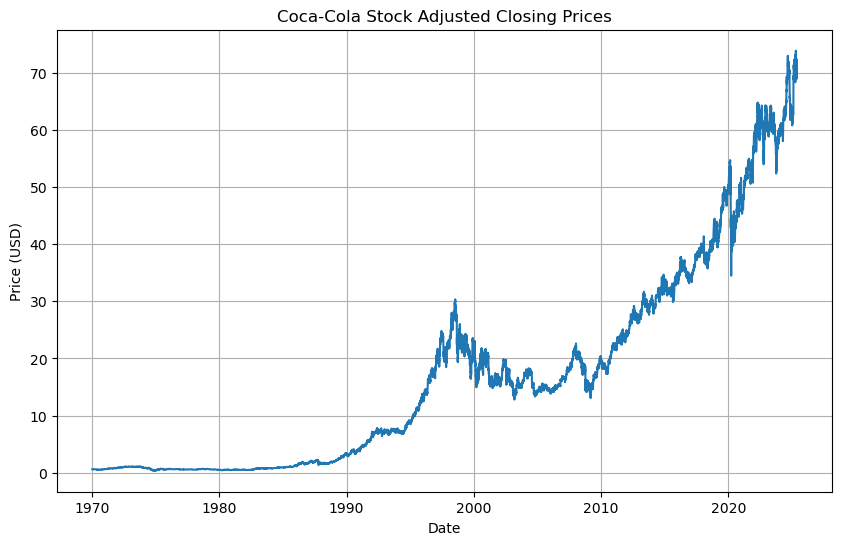

In [127]:
plt.figure(figsize=(10,6))
plt.plot(adjusted_closing_prices)
plt.title('Coca-Cola Stock Adjusted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [128]:
log_prices = np.log(adjusted_closing_prices)
log_prices = log_prices.rename('log_price')
print(log_prices.head())


Date
1970-01-02   -0.527368
1970-01-05   -0.539549
1970-01-06   -0.533358
1970-01-07   -0.527368
1970-01-08   -0.521415
Name: log_price, dtype: float64


In [130]:
log_prices_d = log_prices
log_prices_w = log_prices.resample('W').last()
log_prices_m = log_prices.resample('ME').last()
log_prices_y = log_prices.resample('YE').last()
log_prices_d = log_prices_d.rename('log_price_d')
log_prices_w = log_prices_w.rename('log_price_w')
log_prices_m = log_prices_m.rename('log_price_m')
log_prices_y = log_prices_y.rename('log_price_y')
print(log_prices_d.head())
print(log_prices_w.head())
print(log_prices_m.head())
print(log_prices_y.head())

Date
1970-01-02   -0.527368
1970-01-05   -0.539549
1970-01-06   -0.533358
1970-01-07   -0.527368
1970-01-08   -0.521415
Name: log_price_d, dtype: float64
Date
1970-01-04   -0.527368
1970-01-11   -0.527368
1970-01-18   -0.493135
1970-01-25   -0.504418
1970-02-01   -0.563332
Freq: W-SUN, Name: log_price_w, dtype: float64
Date
1970-01-31   -0.563332
1970-02-28   -0.515991
1970-03-31   -0.551030
1970-04-30   -0.632547
1970-05-31   -0.671810
Freq: ME, Name: log_price_m, dtype: float64
Date
1970-12-31   -0.493135
1971-12-31   -0.131904
1972-12-31    0.064279
1973-12-31   -0.093242
1974-12-31   -0.968561
Freq: YE-DEC, Name: log_price_y, dtype: float64


In [131]:
log_returns_d = log_prices_d.diff()
log_returns_w = log_prices_w.diff()
log_returns_m = log_prices_m.diff()
log_returns_y = log_prices_y.diff()
log_returns_all = log_prices.diff()
log_returns_d = log_returns_d.rename('log_return_d')
log_returns_w = log_returns_w.rename('log_return_w')
log_returns_m = log_returns_m.rename('log_return_m')
log_returns_y = log_returns_y.rename('log_return_y')
log_returns_all = log_returns_all.rename('log_return_all')
print(log_returns_d.head())
print(log_returns_w.head())
print(log_returns_m.head())
print(log_returns_y.head())
print(log_returns_all.head())

Date
1970-01-02         NaN
1970-01-05   -0.012181
1970-01-06    0.006192
1970-01-07    0.005989
1970-01-08    0.005954
Name: log_return_d, dtype: float64
Date
1970-01-04         NaN
1970-01-11    0.000000
1970-01-18    0.034234
1970-01-25   -0.011283
1970-02-01   -0.058914
Freq: W-SUN, Name: log_return_w, dtype: float64
Date
1970-01-31         NaN
1970-02-28    0.047341
1970-03-31   -0.035039
1970-04-30   -0.081517
1970-05-31   -0.039263
Freq: ME, Name: log_return_m, dtype: float64
Date
1970-12-31         NaN
1971-12-31    0.361231
1972-12-31    0.196183
1973-12-31   -0.157521
1974-12-31   -0.875319
Freq: YE-DEC, Name: log_return_y, dtype: float64
Date
1970-01-02         NaN
1970-01-05   -0.012181
1970-01-06    0.006192
1970-01-07    0.005989
1970-01-08    0.005954
Name: log_return_all, dtype: float64


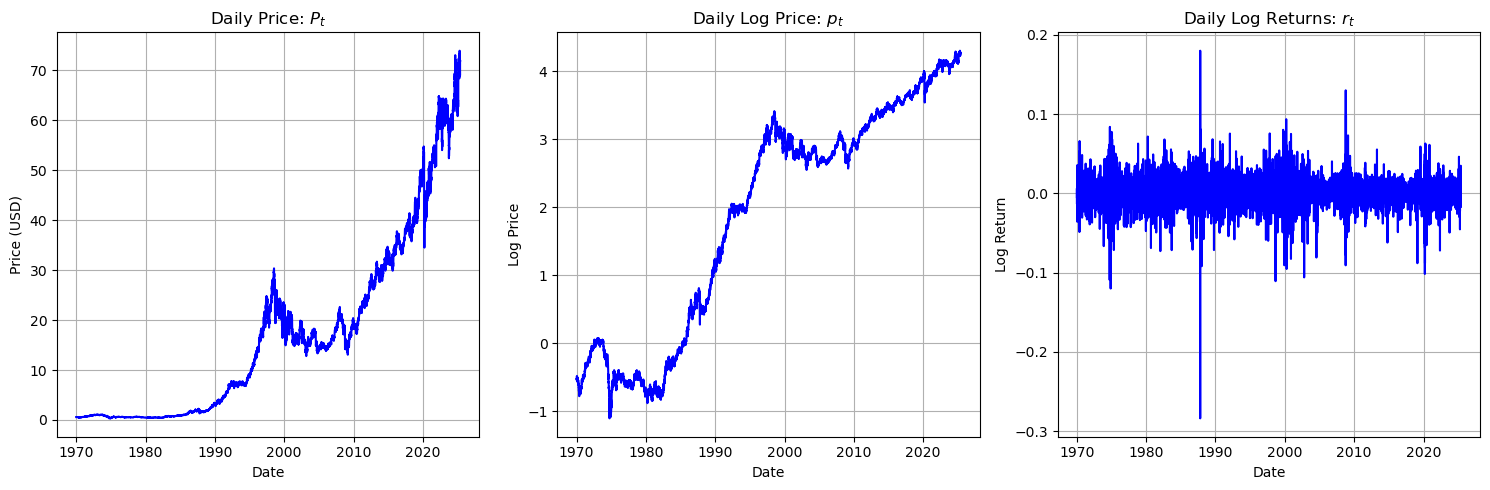

In [161]:
adjusted_closing_prices = adjusted_closing_prices.tz_localize(None)
log_prices = log_prices.tz_localize(None)
log_returns_d = log_returns_d.tz_localize(None)

ss_start_date = pd.to_datetime('1970-01-01').tz_localize(None)
ss_end_date = pd.to_datetime('2025-05-19').tz_localize(None)
closing_prices_selected = adjusted_closing_prices.loc[ss_start_date:ss_end_date]
log_prices_selected = log_prices.loc[ss_start_date:ss_end_date]
log_returns_d_selected = log_returns_d.loc[ss_start_date:ss_end_date]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Daily Price
axs[0].plot(closing_prices_selected.index, closing_prices_selected,
color='blue')
axs[0].set_title('Daily Price: $P_t$')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
axs[0].grid(True)

# Plot Daily Log Price
axs[1].plot(log_prices_selected.index, log_prices_selected,
color='blue')
axs[1].set_title('Daily Log Price: $p_t$')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Log Price')
axs[1].grid(True)

# Plot Daily Log Returns
axs[2].plot(log_returns_d_selected.index, log_returns_d_selected,
color='blue')
axs[2].set_title('Daily Log Returns: $r_t$')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Log Return')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [133]:
summary_stats = pd.DataFrame(index=['Mean', 'St. Deviation',
'Diameter.C.I.Mean', 'Skewness', 'Kurtosis',
'Excess.Kurtosis', 'Min',
'Quant.5%', 'Quant.25%', 'Median.50%',
'Quant.75%', 'Quant.95%', 'Max',
'Jarque.Bera.stat', 'Jarque.Bera.pvalue',
'Lillie.test.stat',
'Lillie.test.pvalue', 'N.obs'],
columns=['Daily', 'Weekly', 'Monthly',
'Annual'])

# Computation of the diameter of confidence interval for the mean
def diameter_ci_mean(series):
    return 1.96 * series.std() / np.sqrt(len(series))

log_price_series = {
'Daily': log_prices_d,
'Weekly': log_prices_w,
'Monthly': log_prices_m,
'Annual': log_prices_y}

for freq, prices in log_price_series.items():
    summary_stats.loc['Mean', freq] = prices.mean()
    summary_stats.loc['St. Deviation', freq] = prices.std()
    summary_stats.loc['Diameter.C.I.Mean', freq] = diameter_ci_mean(prices)
    summary_stats.loc['Skewness', freq] = skew(prices)
    summary_stats.loc['Kurtosis', freq] = kurtosis(prices) + 3 # To get Pearson's Kurtosis
    summary_stats.loc['Excess.Kurtosis', freq] = kurtosis(prices)
    summary_stats.loc['Min', freq] = prices.min()
    summary_stats.loc['Quant.5%', freq] = prices.quantile(0.05)
    summary_stats.loc['Quant.25%', freq] = prices.quantile(0.25)
    summary_stats.loc['Median.50%', freq] = prices.median()
    summary_stats.loc['Quant.75%', freq] = prices.quantile(0.75)
    summary_stats.loc['Quant.95%', freq] = prices.quantile(0.95)
    summary_stats.loc['Max', freq] = prices.max()

# Jarque-Bera test
    jb_stat, jb_pvalue = jarque_bera(prices)
    summary_stats.loc['Jarque.Bera.stat', freq] = jb_stat
    summary_stats.loc['Jarque.Bera.pvalue', freq] = jb_pvalue
    # Lilliefors test (Kolmogorov-Smirnov for normality with Lilliefors correction)
    lillie_stat, lillie_pvalue = lilliefors(prices, dist='norm')
    summary_stats.loc['Lillie.test.stat', freq] = lillie_stat
    summary_stats.loc['Lillie.test.pvalue', freq] = lillie_pvalue
    # Number of observations
    summary_stats.loc['N.obs', freq] = len(prices)
print(summary_stats)

                          Daily      Weekly    Monthly    Annual
Mean                   1.862918    1.867247   1.870397  1.938664
St. Deviation          1.685958    1.686205   1.687352  1.716959
Diameter.C.I.Mean      0.027965    0.061467   0.128248  0.449699
Skewness              -0.354379   -0.357277  -0.359681 -0.395982
Kurtosis               1.550421     1.55333   1.558316  1.607878
Excess.Kurtosis       -1.449579    -1.44667  -1.441684 -1.392122
Min                   -1.104909   -1.104909  -0.996298 -0.968561
Quant.5%              -0.678734   -0.675272  -0.677349  -0.69395
Quant.25%             -0.045209   -0.041631  -0.023834  0.024899
Median.50%             2.678621      2.6795   2.672969  2.690839
Quant.75%              3.197726    3.200282   3.205312  3.228295
Quant.95%              4.078215    4.080322   4.085601  4.090093
Max                    4.302713    4.290459   4.284276  4.275693
Jarque.Bera.stat    1514.763085  313.606346  71.929043  5.985489
Jarque.Bera.pvalue       

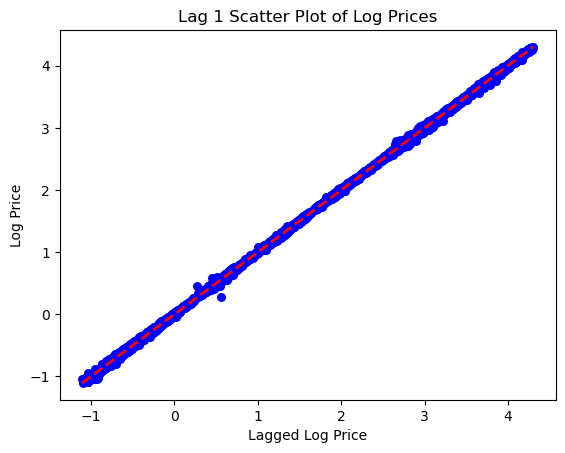

In [134]:
import matplotlib.pyplot as plt

# Define the lag1_scatterplot function
def lag1_scatterplot(data, x_label, y_label, title):
    plt.scatter(data.shift(), data, color='blue', s=30) # Plot log price vs. lagged log price
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot([min(data), max(data)], [min(data), max(data)],
linestyle='dashed', linewidth=2, color='red') 
    

lag1_scatterplot(log_prices, 'Lagged Log Price', 'Log Price', 'Lag 1 Scatter Plot of Log Prices')

plt.show()


In [135]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
stock_data = KO['Adj Close']
adf_result = adfuller(stock_data.dropna())
print(f'ADF Statistic: {adf_result[0]:.6f}')
print(f'p-value: {adf_result[1]:.6f}')
print(f'Critical Values: {adf_result[4]}')
if adf_result[1] < 0.05:
    print("The time series is likely stationary (reject the null hypothesis).")
else : 
    print("The time series is likely non-stationary (fail to reject the null hypothesis).")

ADF Statistic: 1.665508
p-value: 0.998041
Critical Values: {'1%': -3.4308196614807436, '5%': -2.8617475688813787, '10%': -2.5668804841095096}
The time series is likely non-stationary (fail to reject the null hypothesis).


In [136]:
from statsmodels.tsa.stattools import kpss
ss_start_date = pd.to_datetime('1970-01-01')
ss_end_date = pd.to_datetime('2025-05-19')
log_prices_full_period = log_prices.loc[ss_start_date:ss_end_date]

#  Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
try:
    kpss_statistic, p_value, lags, critical_values = kpss(log_prices_full_period.dropna(), regression='c')
except InterpolationWarning:
    print("Warning: Test statistic exceeds table range. p-value is approximated.")

print(f'KPSS Statistic: {kpss_statistic:.4f}')
print(f'p-value: {p_value:.4f}')
print(f'Critical Values: {critical_values}')

if p_value < 0.01:
    print("The time series is highly non-stationary (strongly reject stationarity).")
elif p_value < 0.05:
    print("The time series is non-stationary (reject the null hypothesis of stationarity).")
else:
    print("The time series is stationary (fail to reject the null hypothesis).")

KPSS Statistic: 17.9983
p-value: 0.0100
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The time series is non-stationary (reject the null hypothesis of stationarity).


/var/folders/xb/h01vj8cj4wj1wfj1zx7tkl500000gn/T/ipykernel_65730/3549328801.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_statistic, p_value, lags, critical_values = kpss(log_prices_full_period.dropna(), regression='c')


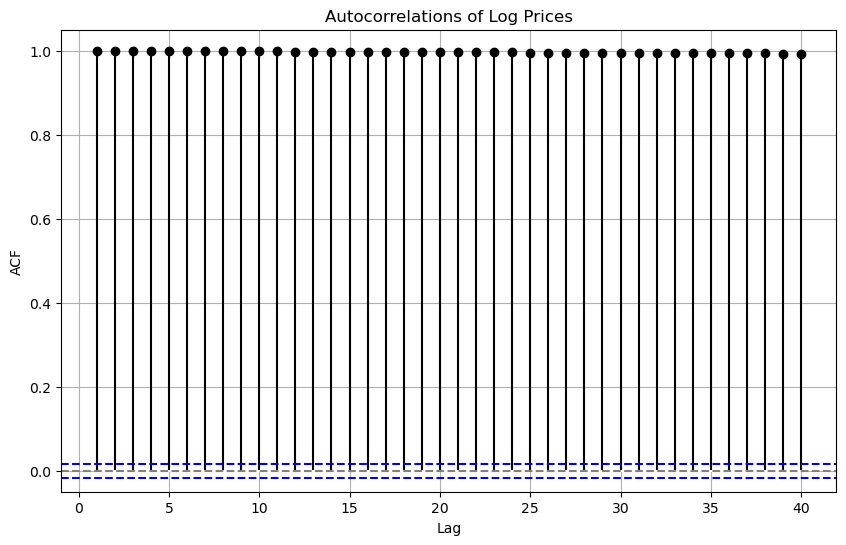

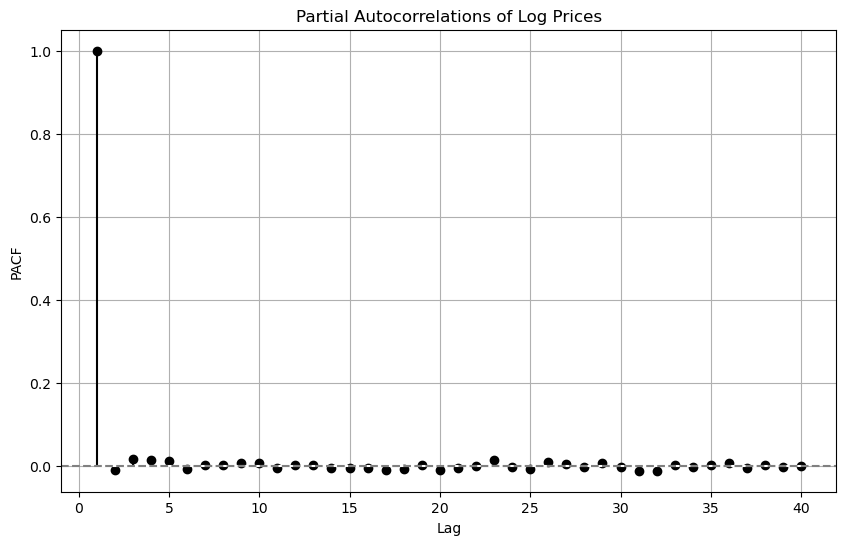

In [137]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
lags = 40
acf_values = acf(log_prices_full_period.dropna(), nlags=lags)

#Bartlett intervals for ACF
Bart_Int = 1.96 / np.sqrt(len(log_prices_full_period.dropna()))

plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, lags + 1), acf_values[1:], linefmt='k-',
markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of Log Prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

pacf_values = pacf(log_prices_full_period.dropna(), nlags=lags)

plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, lags + 1), pacf_values[1:], linefmt='k-',
markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.title('Partial Autocorrelations of Log Prices')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.grid(True)
plt.show()

In [33]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.5/927.5 kB 5.1 MB/s eta 0:00:00a 0:00:01


In [138]:
from arch import unitroot
log_returns_full_period = log_prices_full_period.diff().dropna()
# Augmented Dickey-Fuller (ADF) test on the log returns
adf_stat, adf_pvalue, _, _, _, _ = adfuller(log_returns_full_period)
# Phillips-Perron (PP) test on the log returns
pp_test = unitroot.PhillipsPerron(log_returns_full_period)
pp_stat = pp_test.stat
pp_pvalue = pp_test.pvalue

print(f"ADF Test Statistic: {adf_stat}")
print(f"ADF p-value: {adf_pvalue}")
print(f"PP Test Statistic: {pp_stat}")
print(f"PP p-value: {pp_pvalue}")

if adf_pvalue < 0.05:
    print("ADF Test: The returns are likely stationary (ADF test rejects unit root).")
else:
    print("ADF Test: The returns are likely non-stationary (ADF test fails to reject unit root).")

if pp_pvalue < 0.05:
    print("PP Test: The returns are likely stationary (PP test rejects unit root).")
else:
    print("PP Test: The returns are likely non-stationary (PP test fails to reject unit root).")

ADF Test Statistic: -45.08719997328959
ADF p-value: 0.0
PP Test Statistic: -116.88526874154344
PP p-value: 0.0
ADF Test: The returns are likely stationary (ADF test rejects unit root).
PP Test: The returns are likely stationary (PP test rejects unit root).


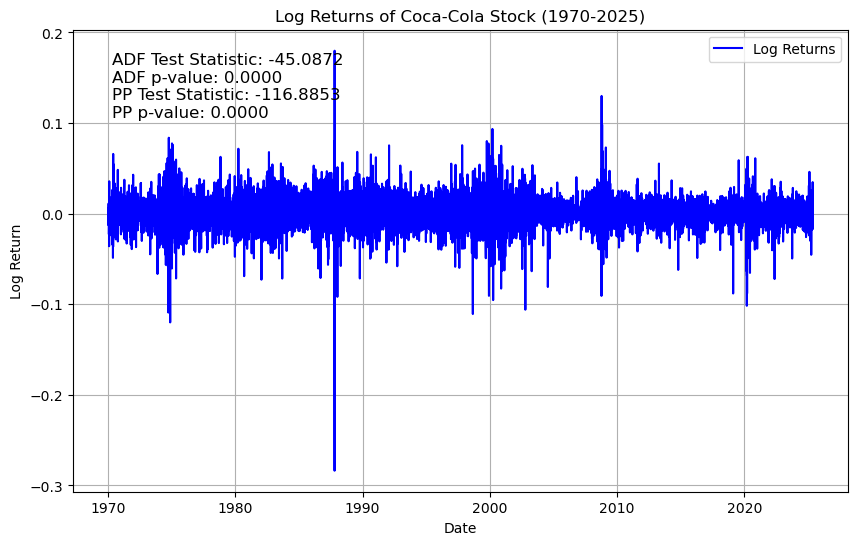

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(log_returns_full_period.index, log_returns_full_period,
label='Log Returns', color='blue')
plt.title('Log Returns of Coca-Cola Stock (1970-2025)')
plt.xlabel('Date')
plt.ylabel('Log Return')

plt.text(0.05, 0.95,
         f'ADF Test Statistic: {adf_stat:.4f}\nADF p-value: {adf_pvalue:.4f}\n'
         f'PP Test Statistic: {pp_stat:.4f}\nPP p-value: {pp_pvalue:.4f}',
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top')
plt.grid(True)
plt.legend()
plt.show()

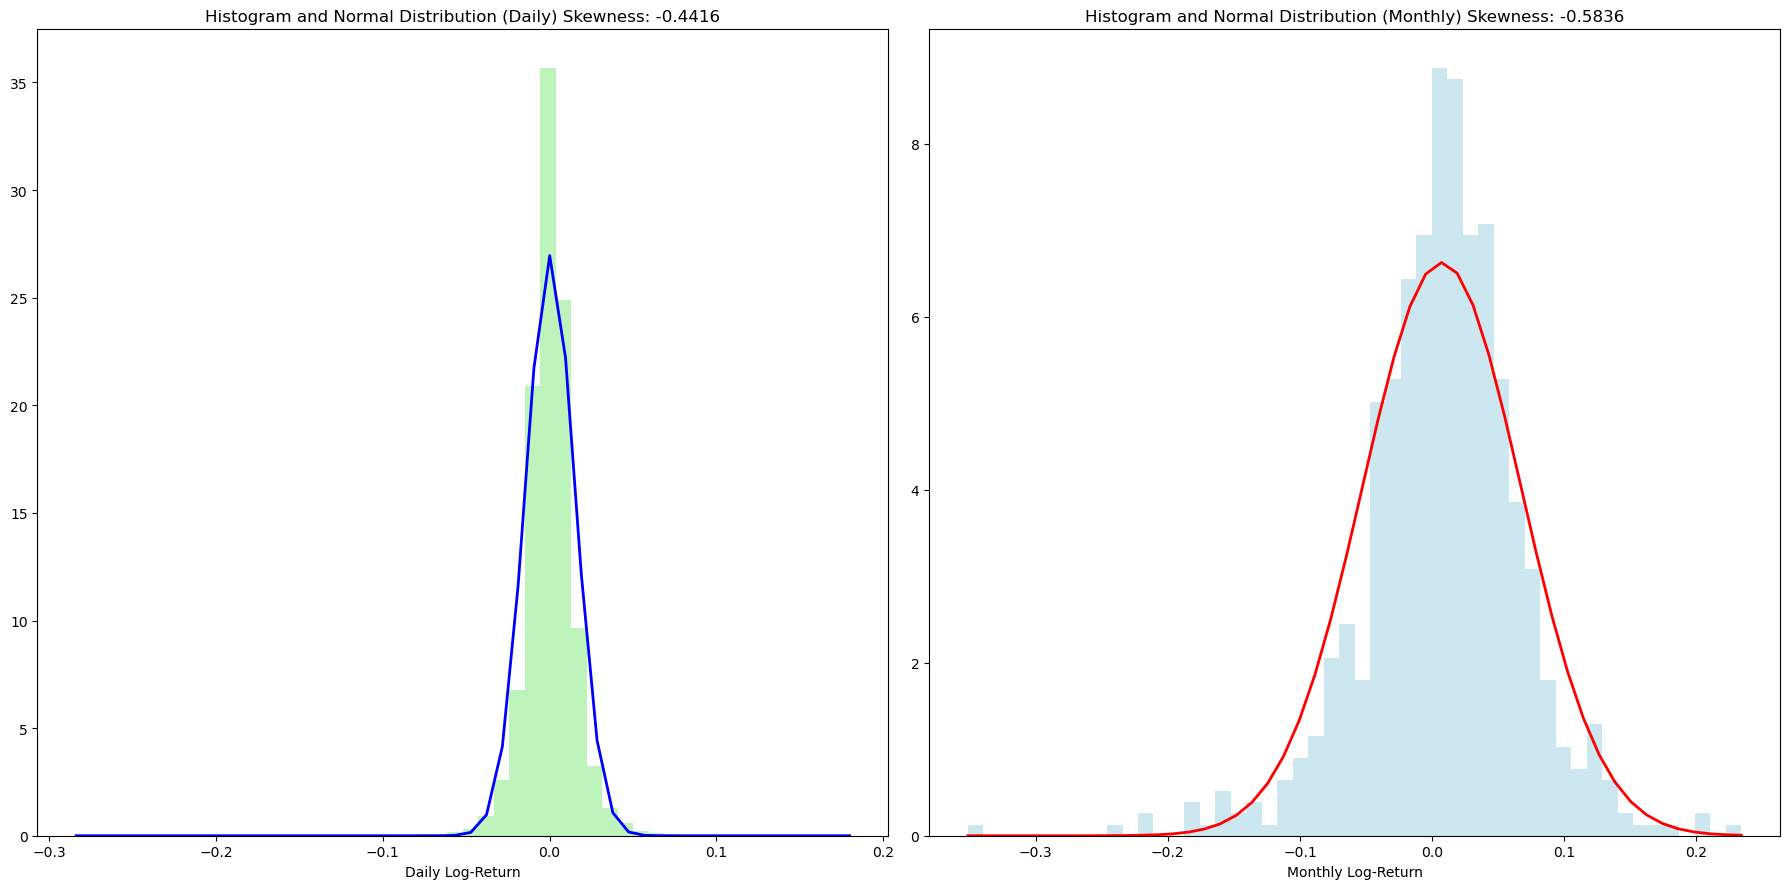

Skewness of daily log returns: -0.4416
Skewness of monthly log returns: -0.5836


In [140]:
import scipy.stats as stats
log_returns_d = log_prices_full_period.diff().dropna()
skewness_d = stats.skew(log_returns_d)
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
axs[0].hist(log_returns_d, bins=50, density=True, color="lightgreen",
alpha=0.6)
norm_y = stats.norm.pdf(np.linspace(log_returns_d.min(),log_returns_d.max()), loc=np.mean(log_returns_d),scale=np.std(log_returns_d))
axs[0].plot(np.linspace(log_returns_d.min(), log_returns_d.max()),norm_y, color="blue", linewidth=2)
axs[0].set_xlabel("Daily Log-Return")
axs[0].set_title(f"Histogram and Normal Distribution (Daily) Skewness: {skewness_d:.4f}")

log_returns_m = log_prices_full_period.resample('ME').last().diff().dropna()
skewness_m = stats.skew(log_returns_m)
axs[1].hist(log_returns_m, bins=50, density=True, color="lightblue",alpha=0.6)
norm_y_m = stats.norm.pdf(np.linspace(log_returns_m.min(),log_returns_m.max()), loc=np.mean(log_returns_m),scale=np.std(log_returns_m))
axs[1].plot(np.linspace(log_returns_m.min(), log_returns_m.max()),norm_y_m, color="red", linewidth=2)
axs[1].set_xlabel("Monthly Log-Return")
axs[1].set_title(f"Histogram and Normal Distribution (Monthly) Skewness: {skewness_m:.4f}")
plt.tight_layout()
plt.show()

print(f"Skewness of daily log returns: {skewness_d:.4f}")
print(f"Skewness of monthly log returns: {skewness_m:.4f}")

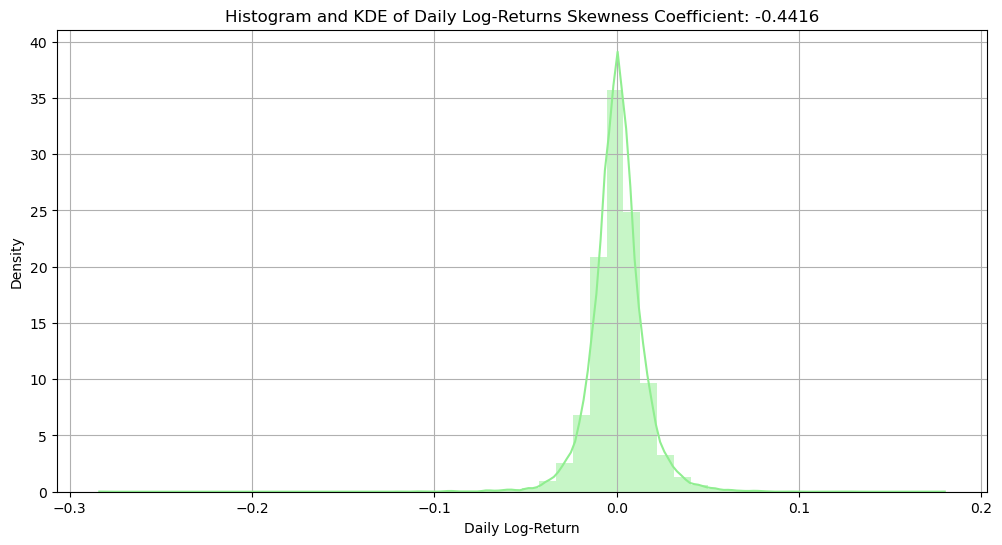

Skewness Coefficient of daily log returns: -0.4416


In [141]:
import seaborn as sns
from scipy.stats import skew

skewness_d = skew(log_returns_d)
plt.figure(figsize=(12, 6))
sns.histplot(log_returns_d, bins=50, kde=True, color='lightgreen',stat='density', linewidth=0)
plt.title(f"Histogram and KDE of Daily Log-Returns Skewness Coefficient: {skewness_d:.4f}")
plt.xlabel("Daily Log-Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()
print(f"Skewness Coefficient of daily log returns: {skewness_d:.4f}")


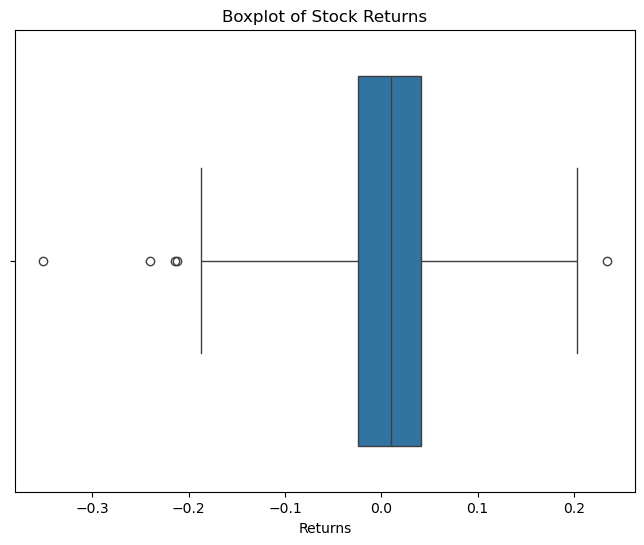

Jarque-Bera Test Statistic: 327.7543
Jarque-Bera Test p-value: 0.0000
The test rejects the null hypothesis: the returns are not normally distributed (likely due to skewness and/or kurtosis).


In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

returns = log_returns_m
returns_series = pd.Series(returns)

plt.figure(figsize=(8, 6))
# Increase whis to 2.5 or even 3 to reduce outliers shown
sns.boxplot(x=returns_series,whis=2.6)
plt.title('Boxplot of Stock Returns')
plt.xlabel('Returns')
plt.show()

# Jarque-Bera test to check for skewness and kurtosis
jb_statistic, jb_p_value = stats.jarque_bera(returns_series)
print(f"Jarque-Bera Test Statistic: {jb_statistic:.4f}")
print(f"Jarque-Bera Test p-value: {jb_p_value:.4f}")

if jb_p_value < 0.05:
    print("The test rejects the null hypothesis: the returns are not normally distributed (likely due to skewness and/or kurtosis).")
else:
    print("The test fails to reject the null hypothesis: the returns do not significantly differ from a normal distribution.")

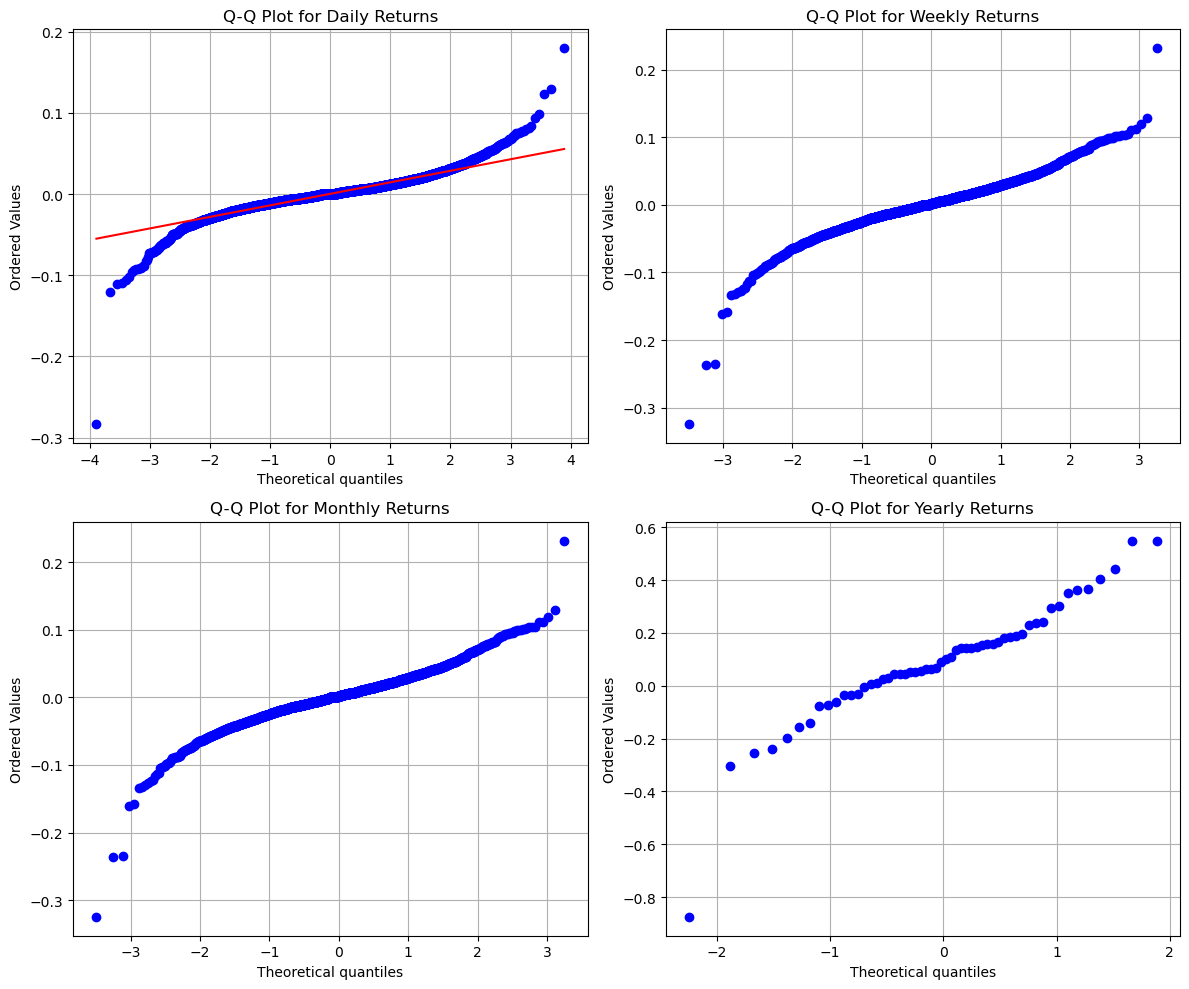

In [143]:
rt_d = log_returns_d
rt_w = log_returns_w
rt_m = log_returns_w
rt_y = log_returns_y
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

stats.probplot(rt_d, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Q-Q Plot for Daily Returns")
axs[0, 0].grid(True)

stats.probplot(rt_w, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Q-Q Plot for Weekly Returns")
axs[0, 1].grid(True)

stats.probplot(rt_m, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Q-Q Plot for Monthly Returns")
axs[1, 0].grid(True)

stats.probplot(rt_y, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Q-Q Plot for Yearly Returns")
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [144]:

kurt_d = stats.kurtosis(rt_d, nan_policy='omit')
kurt_w = stats.kurtosis(rt_w, nan_policy='omit')
kurt_m = stats.kurtosis(rt_m, nan_policy='omit')
kurt_y = stats.kurtosis(rt_y, nan_policy='omit')

print(f"Kurtosis for Daily Returns: {kurt_d}")
print(f"Kurtosis for Weekly Returns: {kurt_w}")
print(f"Kurtosis for Monthly Returns: {kurt_m}")
print(f"Kurtosis for Yearly Returns: {kurt_y}")

def interpret_kurtosis(kurtosis_value):
    if kurtosis_value > 3:
        return "Heavy tails (positive kurtosis)"
    elif kurtosis_value < 3:
        return "Light tails (negative kurtosis)"
    else:
        return "Normal distribution (mesokurtic)"

print("\nInterpretation of Kurtosis:")
print(f"Daily Returns: {interpret_kurtosis(kurt_d)}")
print(f"Weekly Returns: {interpret_kurtosis(kurt_w)}")
print(f"Monthly Returns: {interpret_kurtosis(kurt_m)}")
print(f"Yearly Returns: {interpret_kurtosis(kurt_y)}")

Kurtosis for Daily Returns: 16.50392729811703
Kurtosis for Weekly Returns: 7.45907054855051
Kurtosis for Monthly Returns: 7.45907054855051
Kurtosis for Yearly Returns: 4.660405509203858

Interpretation of Kurtosis:
Daily Returns: Heavy tails (positive kurtosis)
Weekly Returns: Heavy tails (positive kurtosis)
Monthly Returns: Heavy tails (positive kurtosis)
Yearly Returns: Heavy tails (positive kurtosis)


Optimal GARCH(1,2) Model with studentsT Distribution
Best AIC: 45587.1830, Best BIC: 45632.4476


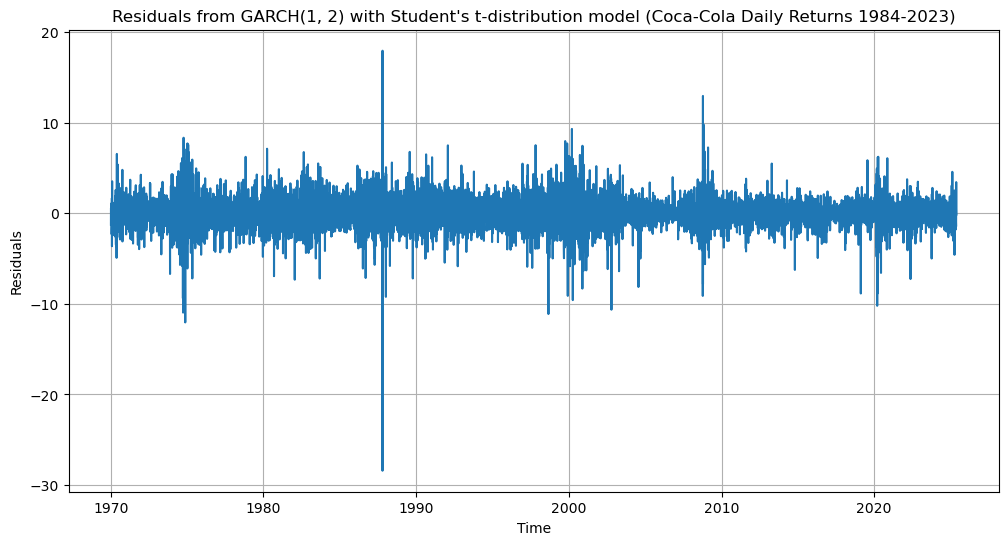

Kurtosis of Residuals (Student's t-distribution): 16.5103
Interpretation of Residual Kurtosis (t-distribution): Heavy tails (positive kurtosis)


In [145]:
from arch import arch_model
stock_data = KO.copy()
stock_data.rename(columns={"Close": "Adj Close"}, inplace=True)
stock_data['Log_Returns'] = np.log(stock_data['Adj Close'] /stock_data['Adj Close'].shift(1))
log_returns = stock_data['Log_Returns'].dropna()
log_returns_rescaled = log_returns * 100
def fit_garch_model(log_returns, p_range, q_range, dist='studentsT'):
    best_aic = np.inf
    best_bic = np.inf
    best_model = None
    best_order = None
    for p in p_range:
        for q in q_range:
            try:
                model = arch_model(log_returns, vol='Garch', p=p, q=q, dist=dist)
                model_fit = model.fit(disp='off')
                if model_fit.aic < best_aic:
                    best_aic = model_fit.aic
                    best_bic = model_fit.bic
                    best_model = model_fit
                    best_order = (p, q)
                if model_fit.bic < best_bic:
                    best_bic = model_fit.bic
            except Exception as e:
                print(f"Error fitting GARCH({p},{q}): {e}")
                continue
    if best_order is None:
        print("No optimal model was found.")
        return None
    print(f"Optimal GARCH({best_order[0]},{best_order[1]}) Model with {dist} Distribution")
    print(f"Best AIC: {best_aic:.4f}, Best BIC: {best_bic:.4f}")
    return best_model, best_order
best_model_t, best_order_t = fit_garch_model(log_returns_rescaled,
p_range=range(1, 3), q_range=range(1, 3), dist='studentsT')

if best_model_t is not None:
    residuals_t = best_model_t.resid
    plt.figure(figsize=(12, 6))
    plt.plot(residuals_t)
    plt.title(f"Residuals from GARCH({best_order_t[0]}, {best_order_t[1]}) with Student's t-distribution model (Coca-Cola Daily Returns 1984-2023)")
    plt.xlabel("Time")
    plt.ylabel("Residuals")
    plt.grid(True)
    plt.show()
    kurt_residuals_t = residuals_t.kurtosis()
    print(f"Kurtosis of Residuals (Student's t-distribution): {kurt_residuals_t:.4f}")
    def interpret_kurtosis(kurtosis_value):
        if kurtosis_value > 3:
            return "Heavy tails (positive kurtosis)"
        elif kurtosis_value < 3:
            return "Light tails (negative kurtosis)"
        else:
            return "Normal distribution (mesokurtic)"
    print(f"Interpretation of Residual Kurtosis (t-distribution): {interpret_kurtosis(kurt_residuals_t)}")
else:
    print("No valid model found. Please try a different range of GARCH orders or check the data.")

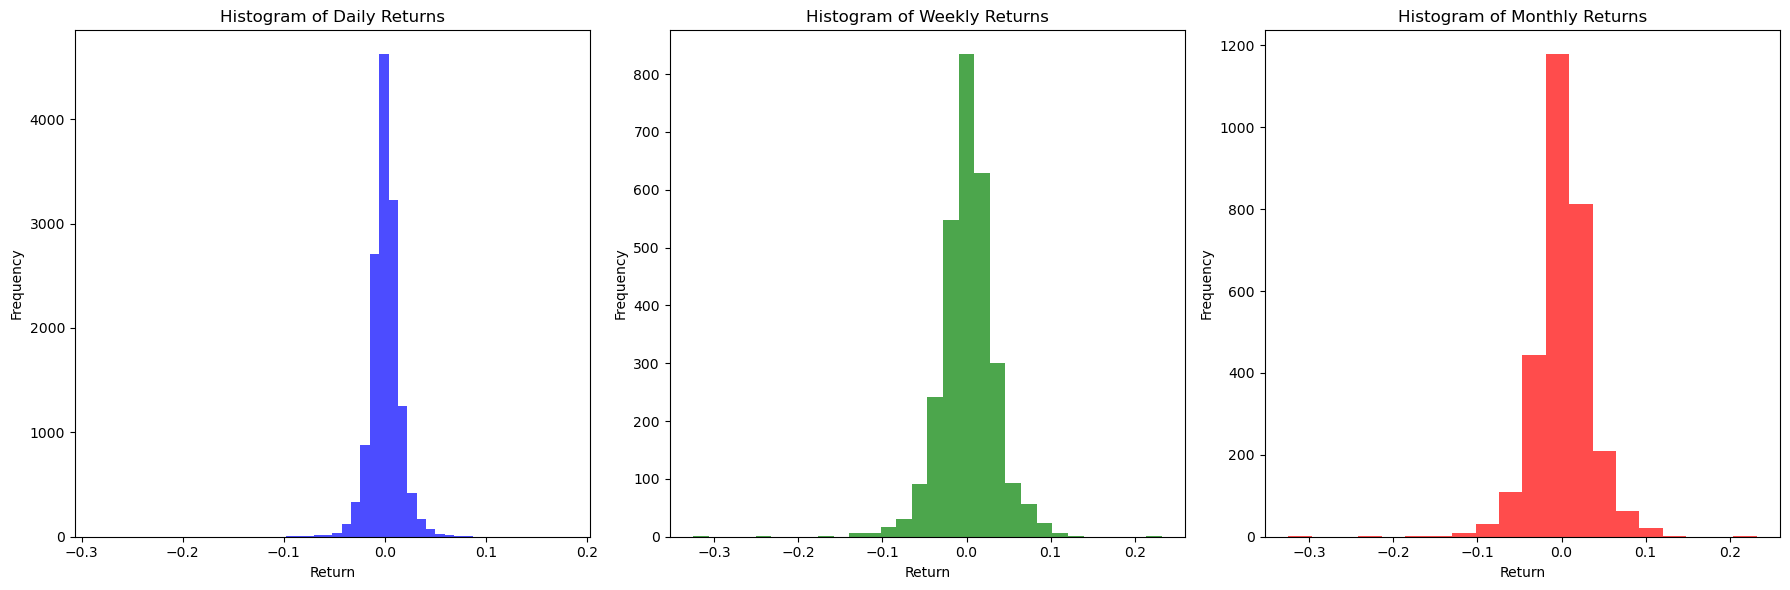

Daily Returns Shapiro-Wilk Test:
Shapiro-Wilk Test: Statistic=0.9207731042483864, p-value=1.8556024121662533e-64
Interpretation: Data does not follow a normal distribution (Reject H0)

Weekly Returns Shapiro-Wilk Test:
Shapiro-Wilk Test: Statistic=0.9459179986639387, p-value=2.4649961738557113e-31
Interpretation: Data does not follow a normal distribution (Reject H0)

Monthly Returns Shapiro-Wilk Test:
Shapiro-Wilk Test: Statistic=0.9459179986639387, p-value=2.4649961738557113e-31
Interpretation: Data does not follow a normal distribution (Reject H0)


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13962.
  res = hypotest_fun_out(*samples, **kwds)


In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
rt_d = log_returns_d.dropna()
rt_w = log_returns_w.dropna()
rt_m = log_returns_w.dropna()
rt_y = log_returns_y.dropna()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].hist(rt_d, bins=50, alpha=0.7, color='blue')
axs[0].set_title('Histogram of Daily Returns')
axs[0].set_xlabel('Return')
axs[0].set_ylabel('Frequency')

axs[1].hist(rt_w, bins=30, alpha=0.7, color='green')
axs[1].set_title('Histogram of Weekly Returns')
axs[1].set_xlabel('Return')
axs[1].set_ylabel('Frequency')

axs[2].hist(rt_m, bins=20, alpha=0.7, color='red')
axs[2].set_title('Histogram of Monthly Returns')
axs[2].set_xlabel('Return')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#Shapiro-Wilk Test for normality
def shapiro_test(data):
    stat, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}")
    if p_value > 0.05:
        return "Data likely follows a normal distribution (Fail to reject H0)"
    else:
        return "Data does not follow a normal distribution (Reject H0)"

print("Daily Returns Shapiro-Wilk Test:")
daily_interpretation = shapiro_test(rt_d)
print(f"Interpretation: {daily_interpretation}")

print("\nWeekly Returns Shapiro-Wilk Test:")
weekly_interpretation = shapiro_test(rt_w)
print(f"Interpretation: {weekly_interpretation}")

print("\nMonthly Returns Shapiro-Wilk Test:")
monthly_interpretation = shapiro_test(rt_m)
print(f"Interpretation: {monthly_interpretation}")


In [147]:
# Anderson-Darling Test for normality
def anderson_test(data):
    result = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test Statistic: {result.statistic}")
    print("Critical Values for different significance levels:")
    for level, cv in zip(result.significance_level,result.critical_values):
        print(f" {level}%: {cv}")
    if result.statistic < result.critical_values[2]: # 5% significance level
        return "Data likely follows a normal distribution (Fail to reject H0)"
    else:
        return "Data does not follow a normal distribution (Reject H0)"
print("Daily Returns Anderson-Darling Test:")
daily_interpretation = anderson_test(rt_d)
print(f"Interpretation: {daily_interpretation}")

print("\nWeekly Returns Anderson-Darling Test:")
weekly_interpretation = anderson_test(rt_w)
print(f"Interpretation: {weekly_interpretation}")

print("\nMonthly Returns Anderson-Darling Test:")
monthly_interpretation = anderson_test(rt_m)
print(f"Interpretation: {monthly_interpretation}")

Daily Returns Anderson-Darling Test:
Anderson-Darling Test Statistic: 165.9275447041946
Critical Values for different significance levels:
 15.0%: 0.576
 10.0%: 0.656
 5.0%: 0.787
 2.5%: 0.918
 1.0%: 1.092
Interpretation: Data does not follow a normal distribution (Reject H0)

Weekly Returns Anderson-Darling Test:
Anderson-Darling Test Statistic: 21.251726343180508
Critical Values for different significance levels:
 15.0%: 0.575
 10.0%: 0.655
 5.0%: 0.786
 2.5%: 0.917
 1.0%: 1.09
Interpretation: Data does not follow a normal distribution (Reject H0)

Monthly Returns Anderson-Darling Test:
Anderson-Darling Test Statistic: 21.251726343180508
Critical Values for different significance levels:
 15.0%: 0.575
 10.0%: 0.655
 5.0%: 0.786
 2.5%: 0.917
 1.0%: 1.09
Interpretation: Data does not follow a normal distribution (Reject H0)


In [148]:
from statsmodels.stats.diagnostic import lilliefors

def lilliefors_test(data):
    statistic, p_value = lilliefors(data, dist='norm')
    print(f"Lilliefors Test Statistic: {statistic}")
    print(f"P-value: {p_value}")
    if p_value < 0.05:
        return "Data does not follow a normal distribution (Reject H0)"
    else:
        return "Data likely follows a normal distribution (Fail to reject H0)"

print("Daily Returns Lilliefors Test:")
daily_interpretation = lilliefors_test(rt_d)
print(f"Interpretation: {daily_interpretation}")

print("\nWeekly Returns Lilliefors Test:")
weekly_interpretation = lilliefors_test(rt_w)
print(f"Interpretation: {weekly_interpretation}")

print("\nMonthly Returns Lilliefors Test:")
monthly_interpretation = lilliefors_test(rt_m)
print(f"Interpretation: {monthly_interpretation}")

Daily Returns Lilliefors Test:
Lilliefors Test Statistic: 0.07001927289116305
P-value: 0.0009999999999998899
Interpretation: Data does not follow a normal distribution (Reject H0)

Weekly Returns Lilliefors Test:
Lilliefors Test Statistic: 0.061049869376153865
P-value: 0.0009999999999998899
Interpretation: Data does not follow a normal distribution (Reject H0)

Monthly Returns Lilliefors Test:
Lilliefors Test Statistic: 0.061049869376153865
P-value: 0.0009999999999998899
Interpretation: Data does not follow a normal distribution (Reject H0)


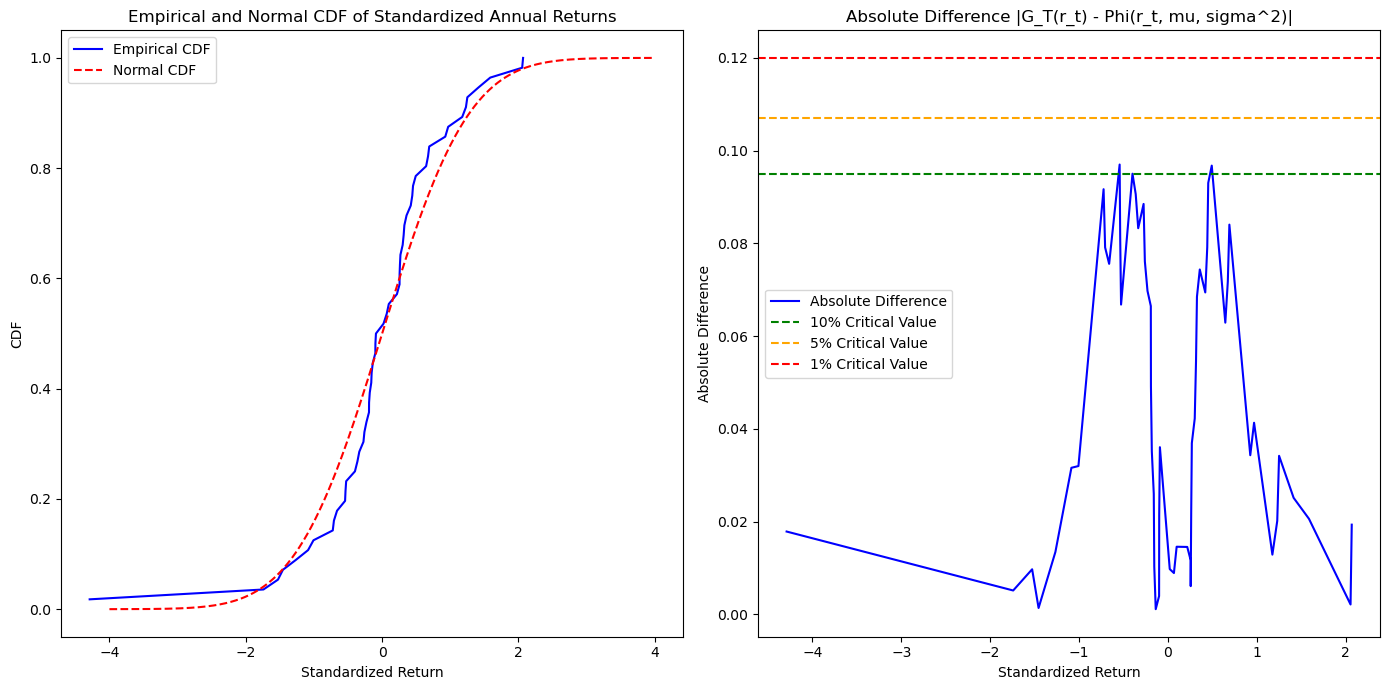

In [152]:
stock_data_CDF = KO.copy()
stock_data_CDF.rename(columns={"Close": "Adj Close"}, inplace=True)
stock_data_CDF['Log_Returns'] = np.log(stock_data_CDF['Adj Close'] /stock_data_CDF['Adj Close'].shift(1))
log_returns = stock_data_CDF['Log_Returns'].dropna()
annual_returns = stock_data_CDF['Log_Returns'].resample('YE').sum().dropna()
annual_returns_standardized = (annual_returns - annual_returns.mean())/ annual_returns.std()

x_values = np.linspace(-4, 4, 1000)
plt.figure(figsize=(14, 7))

# Left panel: Empirical CDF and Normal CDF
plt.subplot(1, 2, 1)
plt.plot(np.sort(annual_returns_standardized), np.arange(1,
len(annual_returns_standardized) + 1) /
len(annual_returns_standardized), label='Empirical CDF', color='blue')
plt.plot(x_values, stats.norm.cdf(x_values), label='Normal CDF',
color='red', linestyle='--')
plt.title('Empirical and Normal CDF of Standardized Annual Returns')
plt.xlabel('Standardized Return')
plt.ylabel('CDF')
plt.legend()

# Compute and plot the absolute difference |G_T(r_t) - Phi(r_t, mu, sigma^2)| for the right panel
# Calculate the empirical CDF G_T(r_t)
sorted_returns = np.sort(annual_returns_standardized)
empirical_cdf = np.arange(1, len(sorted_returns) + 1) / len(sorted_returns)

# Calculate the normal CDF Phi(r_t, mu, sigma^2)
mu_hat = annual_returns_standardized.mean()
sigma_hat = annual_returns_standardized.std()
normal_cdf = stats.norm.cdf(sorted_returns, loc=mu_hat, scale=sigma_hat)

abs_diff = np.abs(empirical_cdf - normal_cdf)
plt.subplot(1, 2, 2)
plt.plot(sorted_returns, abs_diff, label='Absolute Difference',
color='blue')

critical_values = {
0.1: 0.095,
0.05: 0.107,
0.01: 0.120
}

plt.axhline(y=critical_values[0.1], label='10% Critical Value', linestyle='--', color='green')
plt.axhline(y=critical_values[0.05], label='5% Critical Value', linestyle='--', color='orange')
plt.axhline(y=critical_values[0.01], label='1% Critical Value', linestyle='--', color='red')

plt.title('Absolute Difference |G_T(r_t) - Phi(r_t, mu, sigma^2)|')
plt.xlabel('Standardized Return')
plt.ylabel('Absolute Difference')
plt.legend()

plt.tight_layout()
plt.show()

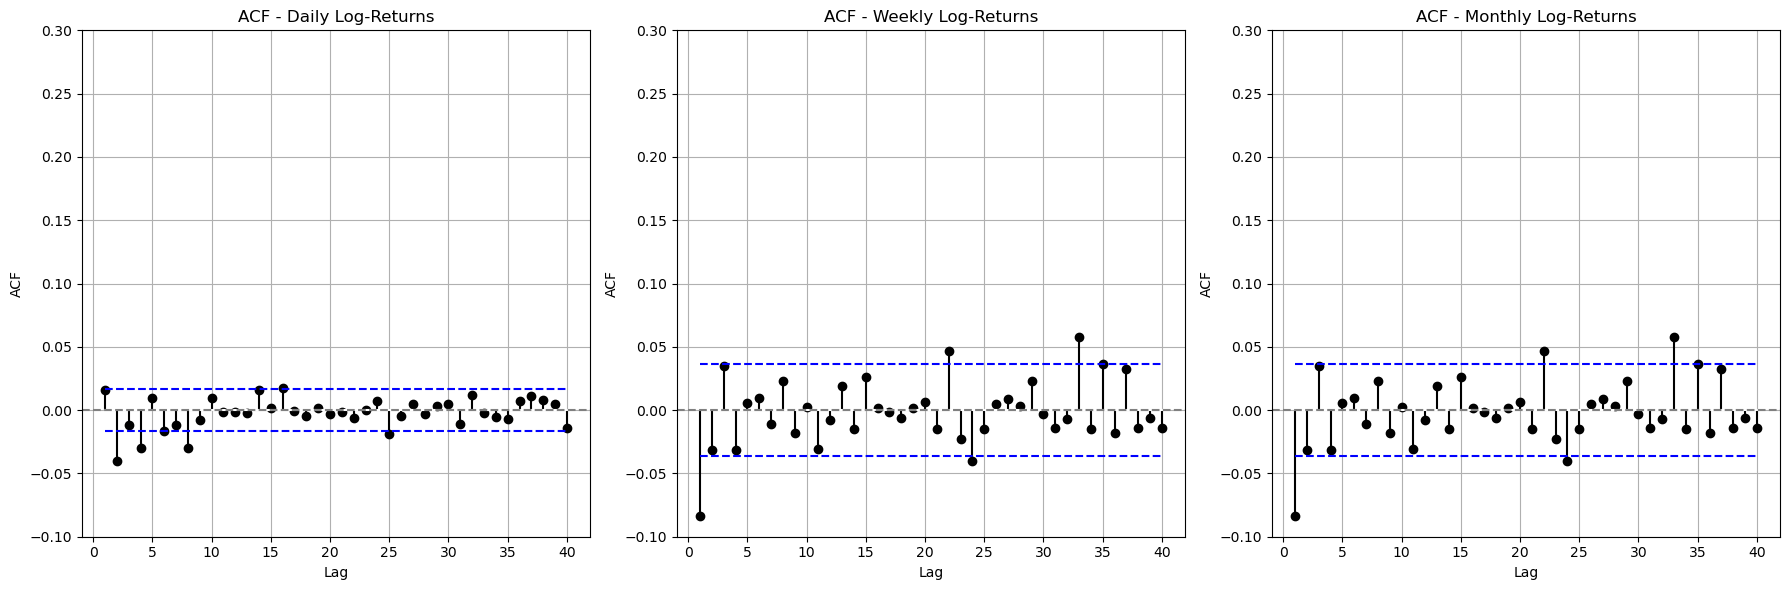

Interpretation of ACF - Daily Log-Returns:
Significant autocorrelation detected in daily returns at lags: [ 2  4  6  8 16 25].

Interpretation of ACF - Weekly Log-Returns:
Significant autocorrelation detected in weekly returns at lags: [ 1 22 24 33].

Interpretation of ACF - Monthly Log-Returns:
Significant autocorrelation detected in monthly returns at lags: [ 1 22 24 33].


In [156]:
from statsmodels.tsa.stattools import acf

lags_0 = 40

# ACF for daily log-returns
acf_values_daily = acf(rt_d, nlags=lags_0)

# Bartlett intervals for daily ACF
confint = 1.96 / np.sqrt(len(rt_d))
confint_upper = np.full(lags, confint)
confint_lower = -np.full(lags, confint)

acf_values_weekly = acf(rt_w, nlags=lags_0)
confint_weekly = 1.96 / np.sqrt(len(rt_w))
confint_weekly_upper = np.full(lags, confint_weekly)
confint_weekly_lower = -np.full(lags, confint_weekly)

acf_values_monthly = acf(rt_m, nlags=lags_0)
confint_monthly = 1.96 / np.sqrt(len(rt_m))
confint_monthly_upper = np.full(lags, confint_monthly)
confint_monthly_lower = -np.full(lags, confint_monthly)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].stem(np.arange(1, lags + 1), acf_values_daily[1:],
linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0].axhline(y=0, color='gray', linestyle='--')
axs[0].plot(np.arange(1, lags + 1), confint_upper, color='blue',
linestyle='dashed')
axs[0].plot(np.arange(1, lags + 1), confint_lower, color='blue',
linestyle='dashed')
axs[0].set_ylim(-0.1, 0.3)
axs[0].set_title('ACF - Daily Log-Returns')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
axs[0].grid(True)

axs[1].stem(np.arange(1, lags_0 + 1), acf_values_weekly[1:],
linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_upper,
color='blue', linestyle='dashed')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_lower,
color='blue', linestyle='dashed')
axs[1].set_ylim(-0.1, 0.3)
axs[1].set_title('ACF - Weekly Log-Returns')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('ACF')
axs[1].grid(True)

axs[2].stem(np.arange(1, lags_0 + 1), acf_values_monthly[1:],
linefmt='k-', markerfmt='ko', basefmt='w-')
axs[2].axhline(y=0, color='gray', linestyle='--')
axs[2].plot(np.arange(1, lags_0 + 1), confint_monthly_upper,
color='blue', linestyle='dashed')
axs[2].plot(np.arange(1, lags_0 + 1), confint_monthly_lower,
color='blue', linestyle='dashed')
axs[2].set_ylim(-0.1, 0.3)
axs[2].set_title('ACF - Monthly Log-Returns')
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('ACF')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Interpretation of ACF Results:
def interpret_acf(acf_values, confint_upper, confint_lower, frequency):
    significant_lags = np.where((acf_values > confint_upper) | (acf_values < confint_lower))[0]
    if len(significant_lags) == 0:
        return f"No significant autocorrelation detected in {frequency} returns."
    else:
        return f"Significant autocorrelation detected in {frequency} returns at lags: {significant_lags + 1}."

print("Interpretation of ACF - Daily Log-Returns:")
print(interpret_acf(acf_values_daily[1:], confint_upper, confint_lower, "daily"))

print("\nInterpretation of ACF - Weekly Log-Returns:")
print(interpret_acf(acf_values_weekly[1:], confint_weekly_upper, confint_weekly_lower, "weekly"))

print("\nInterpretation of ACF - Monthly Log-Returns:")
print(interpret_acf(acf_values_monthly[1:], confint_monthly_upper, confint_monthly_lower, "monthly"))



In [157]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags_1 = 40
lb_results = acorr_ljungbox(rt_d, lags=lags_1)
lb_stat = lb_results['lb_stat']
lb_pvalue = lb_results['lb_pvalue']

def interpret_ljungbox(lb_stat, lb_pvalue):
    significant_lags = np.where(lb_pvalue < 0.05)[0] # lags with p- value < 0.05
    if len(significant_lags) == 0:
        return "Fail to reject the null hypothesis: No autocorrelation detected in returns."
    else:
        return f"Reject the null hypothesis: Autocorrelation detected at lags {significant_lags + 1} (p-value < 0.05)."

print(f"Ljung-Box Test statistics: {lb_stat}")
print(f"Ljung-Box Test p-values: {lb_pvalue}")
print(interpret_ljungbox(lb_stat, lb_pvalue))

Ljung-Box Test statistics: 1      3.447978
2     26.312079
3     28.347543
4     40.763505
5     42.102675
6     46.033033
7     47.886163
8     60.516843
9     61.383139
10    62.681221
11    62.708357
12    62.734656
13    62.827915
14    66.328885
15    66.366221
16    70.627766
17    70.630826
18    70.926827
19    70.977315
20    71.131543
21    71.161063
22    71.688862
23    71.689166
24    72.362285
25    77.414022
26    77.716130
27    78.003780
28    78.169025
29    78.344184
30    78.644872
31    80.421394
32    82.491207
33    82.574100
34    82.940971
35    83.620394
36    84.417217
37    86.098099
38    87.038389
39    87.393826
40    90.056645
Name: lb_stat, dtype: float64
Ljung-Box Test p-values: 1     6.332921e-02
2     1.933769e-06
3     3.070354e-06
4     3.008574e-08
5     5.615219e-08
6     2.916059e-08
7     3.747786e-08
8     3.690152e-10
9     7.251499e-10
10    1.122838e-09
11    2.899439e-09
12    7.130059e-09
13    1.630724e-08
14    8.851147e-09
15    1.9662

In [155]:
import statsmodels.api as sm

def interpret_ljungbox(lb_stat, lb_pvalue):
    lb_pvalue = np.atleast_1d(lb_pvalue) # Ensure p-value is at least 1D
    significant_lags = np.where(lb_pvalue < 0.05)[0] # Find lags with p-value < 0.05
    if len(significant_lags) == 0:
        return "Fail to reject the null hypothesis: No autocorrelation detected in returns."
    else:
        return f"Reject the null hypothesis: Autocorrelation detected at lags {significant_lags + 1}."

# Ljung-Box Test for lag=1
ljungbox_test_1 = sm.stats.acorr_ljungbox(rt_d, lags=[1], boxpierce=True)
bp_stat_1 = ljungbox_test_1['bp_stat'].iloc[0] # Box-Pierce stat
lb_stat_1 = ljungbox_test_1['lb_stat'].iloc[0] # Ljung-Box stat
bp_pval_1 = ljungbox_test_1['bp_pvalue'].iloc[0] # Box-Pierce p-value
lb_pval_1 = ljungbox_test_1['lb_pvalue'].iloc[0] # Ljung-Box p-value

print(f"Box-Pierce, lag=1: Stat: {round(bp_stat_1, 3)} - p-value: {round(bp_pval_1, 3)}")
print(f"Ljung-Box, lag=1: Stat: {round(lb_stat_1, 3)} - p-value: {round(lb_pval_1, 3)}")
print(interpret_ljungbox(lb_stat_1, lb_pval_1))

# Ljung-Box Test for lag=5
ljungbox_test_5 = sm.stats.acorr_ljungbox(rt_d, lags=[1, 2, 3, 4, 5], boxpierce=True)
bp_stat_5 = ljungbox_test_5['bp_stat'].iloc[0]
lb_stat_5 = ljungbox_test_5['lb_stat'].iloc[0]
bp_pval_5 = ljungbox_test_5['bp_pvalue'].iloc[0]
lb_pval_5 = ljungbox_test_5['lb_pvalue'].iloc[0]

print(f"Box-Pierce, lag=5: Stat: {round(bp_stat_5, 3)} - p-value: {round(bp_pval_5, 3)}")
print(f"Ljung-Box, lag=5: Stat: {round(lb_stat_5, 3)} - p-value: {round(lb_pval_5, 3)}")
print(interpret_ljungbox(lb_stat_5, lb_pval_5))

#LB for multiple Lags
my_max_lag = 25
lags_all = np.arange(1, my_max_lag + 1)
my_acf = sm.tsa.acf(rt_d, nlags=my_max_lag)
my_acf_diameter = 1.96 / np.sqrt(len(rt_d)) # 95% confidence interval
my_acf_tstat_0 = (my_acf[1:] - 0) / np.sqrt(1 / len(rt_d))

my_LjungBox = sm.stats.diagnostic.acorr_ljungbox(rt_d, lags=lags_all, boxpierce=False)
my_BoxPierce = sm.stats.diagnostic.acorr_ljungbox(rt_d, lags=lags_all, boxpierce=True)

crit_value_5_BP = stats.chi2.ppf(0.95, lags_all)

my_table = np.column_stack((
    lags_all,
    my_acf[1:], # ACF values
    np.full(my_max_lag, my_acf_diameter), # ACF diameter
    my_acf_tstat_0, # ACF t-statistics
    my_BoxPierce['bp_stat'], # Box-Pierce statistics
    my_BoxPierce['bp_pvalue'], # Box-Pierce p-values
    my_LjungBox['lb_stat'], # Ljung-Box statistics
    my_LjungBox['lb_pvalue'], # Ljung-Box p-values
    np.full(my_max_lag, crit_value_5_BP) # Critical values for Box-Pierce
))

column_names = ["lag", "acf", "acf diam.", "acf test", "B-P stat", "B-P pval", "L-B stat", "L-B pval", "crit"]
my_table_df = pd.DataFrame(data=my_table, columns=column_names)
my_table_df = my_table_df.round(3)
print(my_table_df)

def interpret_results(df):
    for i, row in df.iterrows():
        if row['B-P pval'] < 0.05:
            print(f"Lag {row['lag']}: Box-Pierce test indicates autocorrelation.")
        else:
            print(f"Lag {row['lag']}: Box-Pierce test does not indicate autocorrelation.")
        if row['L-B pval'] < 0.05:
            print(f"Lag {row['lag']}: Ljung-Box test indicates autocorrelation.")
        else:
            print(f"Lag {row['lag']}: Ljung-Box test does not indicate autocorrelation.")
interpret_results(my_table_df)            

Box-Pierce, lag=1: Stat: 3.447 - p-value: 0.063
Ljung-Box, lag=1: Stat: 3.448 - p-value: 0.063
Fail to reject the null hypothesis: No autocorrelation detected in returns.
Box-Pierce, lag=5: Stat: 3.447 - p-value: 0.063
Ljung-Box, lag=5: Stat: 3.448 - p-value: 0.063
Fail to reject the null hypothesis: No autocorrelation detected in returns.
     lag    acf  acf diam.  acf test  B-P stat  B-P pval  L-B stat  L-B pval  \
0    1.0  0.016      0.017     1.857     3.447     0.063     3.448     0.063   
1    2.0 -0.040      0.017    -4.781    26.305     0.000    26.312     0.000   
2    3.0 -0.012      0.017    -1.426    28.340     0.000    28.348     0.000   
3    4.0 -0.030      0.017    -3.523    40.750     0.000    40.764     0.000   
4    5.0  0.010      0.017     1.157    42.089     0.000    42.103     0.000   
5    6.0 -0.017      0.017    -1.982    46.017     0.000    46.033     0.000   
6    7.0 -0.012      0.017    -1.361    47.869     0.000    47.886     0.000   
7    8.0 -0.030   

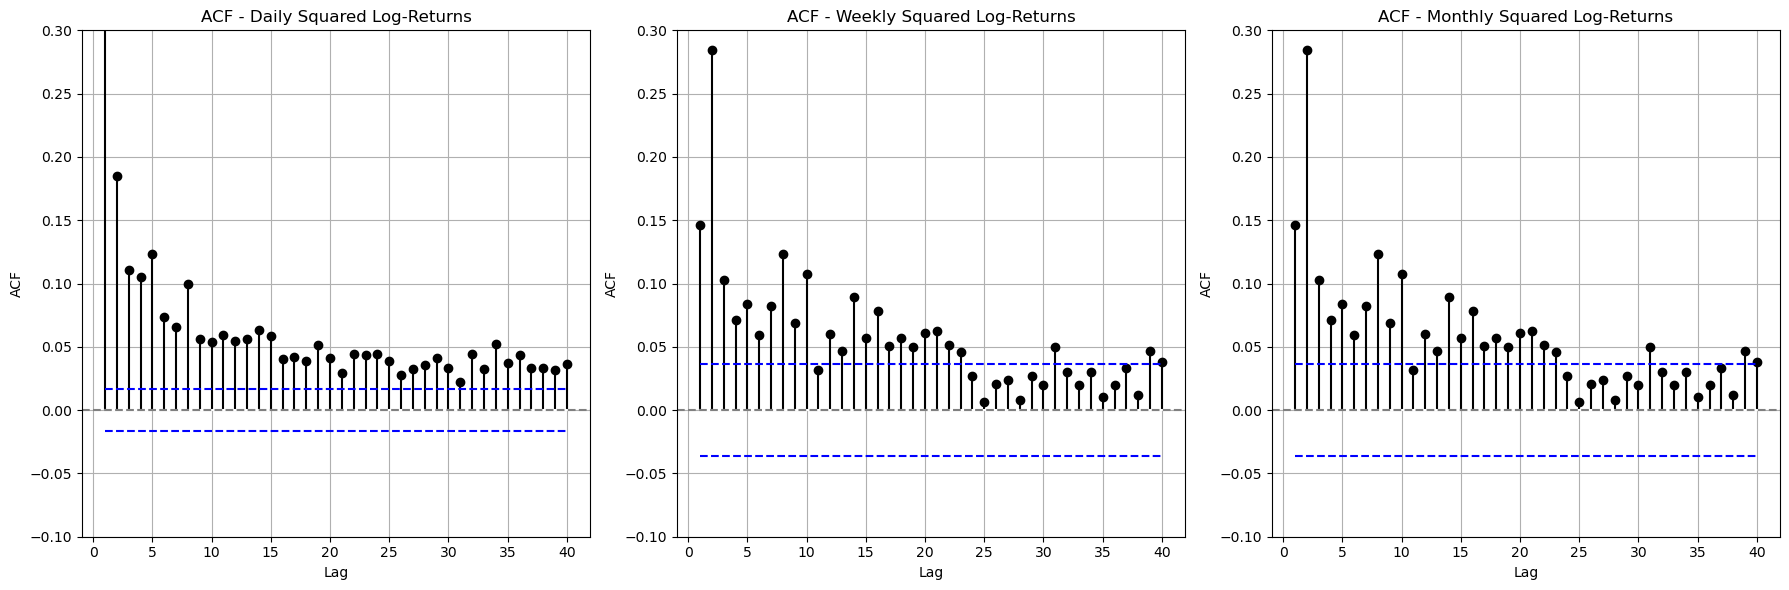

In [158]:
lags_2 = 40
acf_values_daily = sm.tsa.acf(rt_d**2, nlags=lags_2)
confint = 1.96 / np.sqrt(len(rt_d))
confint_upper = np.full(lags_2, confint)
confint_lower = -np.full(lags_2, confint)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].stem(np.arange(1, lags_2 + 1), acf_values_daily[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0].axhline(y=0, color='gray', linestyle='--')
axs[0].plot(np.arange(1, lags_2 + 1), confint_upper, color='blue', linestyle='dashed')
axs[0].plot(np.arange(1, lags_2 + 1), confint_lower, color='blue', linestyle='dashed')
axs[0].set_ylim(-0.1, 0.3)
axs[0].set_title('ACF - Daily Squared Log-Returns')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
axs[0].grid(True)

# ACF of squared weekly log-returns
acf_values_weekly = sm.tsa.acf(rt_w**2, nlags=lags_2)

# Bartlett intervals for weekly log-returns
confint_weekly = 1.96 / np.sqrt(len(rt_w))
confint_weekly_upper = np.full(lags_2, confint_weekly)
confint_weekly_lower = -np.full(lags_2, confint_weekly)

# ACF of weekly squared log-returns
axs[1].stem(np.arange(1, lags_2 + 1), acf_values_weekly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].plot(np.arange(1, lags_2 + 1), confint_weekly_upper, color='blue', linestyle='dashed')
axs[1].plot(np.arange(1, lags_2 + 1), confint_weekly_lower, color='blue', linestyle='dashed')
axs[1].set_ylim(-0.1, 0.3)
axs[1].set_title('ACF - Weekly Squared Log-Returns')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('ACF')
axs[1].grid(True)

acf_values_monthly = sm.tsa.acf(rt_m**2, nlags=lags_2)
confint_monthly = 1.96 / np.sqrt(len(rt_m))
confint_monthly_upper = np.full(lags_2, confint_monthly)
confint_monthly_lower = -np.full(lags_2, confint_monthly)

axs[2].stem(np.arange(1, lags_2 + 1), acf_values_monthly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[2].axhline(y=0, color='gray', linestyle='--')
axs[2].plot(np.arange(1, lags_2 + 1), confint_monthly_upper, color='blue', linestyle='dashed')
axs[2].plot(np.arange(1, lags_2 + 1), confint_monthly_lower, color='blue', linestyle='dashed')
axs[2].set_ylim(-0.1, 0.3)
axs[2].set_title('ACF - Monthly Squared Log-Returns')
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('ACF')
axs[2].grid(True)

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000219. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000219. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


ARCH Model Results:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:              log_price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                39843.5
Distribution:                  Normal   AIC:                          -79681.0
Method:            Maximum Likelihood   BIC:                          -79658.4
                                        No. Observations:                13962
Date:                Mon, May 26 2025   Df Residuals:                    13961
Time:                        12:03:36   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.7039e-04  1.172e-04      

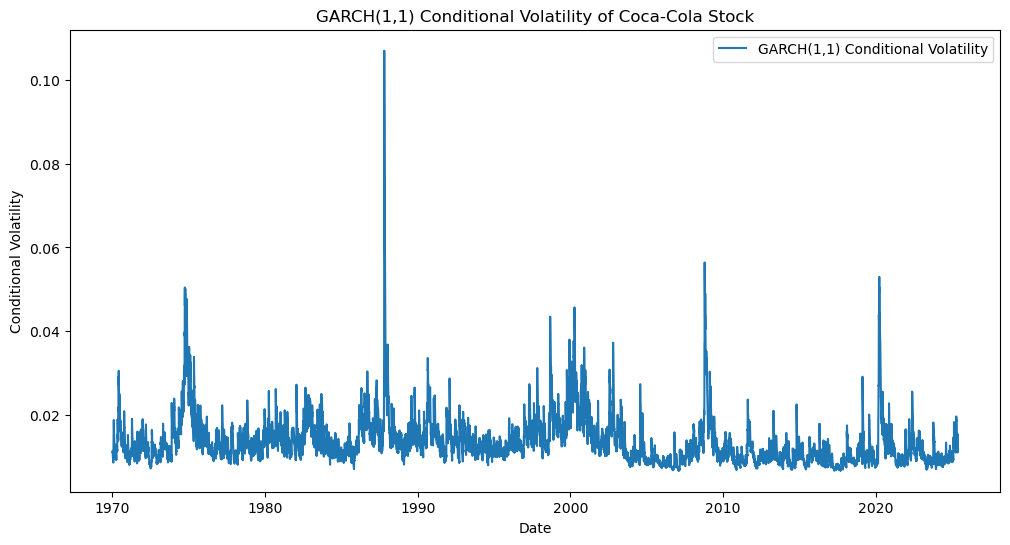


ARCH Model Parameters:
mu          0.000570
omega       0.000153
alpha[1]    0.300005
Name: params, dtype: float64

GARCH Model Parameters:
mu          0.000523
omega       0.000004
alpha[1]    0.100000
beta[1]     0.880000
Name: params, dtype: float64

--- ARCH Model Interpretation ---
ARCH model's coefficient is significant (p-value: 0.0000), indicating time-varying volatility.

--- GARCH Model Interpretation ---
GARCH(1) ARCH term (alpha) is significant (p-value: 0.0000), indicating volatility clustering and the effect of past squared returns on current volatility.
GARCH(1) GARCH term (beta) is significant (p-value:0.0000), indicating that volatility persistence is present and shocks to volatility will persist.

The conditional volatility from the GARCH(1,1) model shows periods of higher volatility clustering together (spikes in the plot), which suggests that volatility shocks persist over time, a characteristic of volatility clustering.


In [160]:
from arch import arch_model

arch_model_instance = arch_model(rt_d, vol='ARCH', p=1)# p=1 for ARCH(1) model
arch_fit = arch_model_instance.fit(disp="off")

garch_model_instance = arch_model(rt_d, vol='Garch', p=1, q=1) # p=1, q=1 for GARCH(1,1)
garch_fit = garch_model_instance.fit(disp="off")

print("ARCH Model Results:")
print(arch_fit.summary())

print("\nGARCH Model Results:")
print(garch_fit.summary())

plt.figure(figsize=(12, 6))

plt.plot(garch_fit.conditional_volatility, label='GARCH(1,1) Conditional Volatility')
plt.title('GARCH(1,1) Conditional Volatility of Coca-Cola Stock')
plt.xlabel('Date')
plt.ylabel('Conditional Volatility')
plt.legend()
plt.show()

print("\nARCH Model Parameters:")
print(arch_fit.params)
print("\nGARCH Model Parameters:")
print(garch_fit.params)

arch_coeff = arch_fit.params.get('omega', None)
arch_pvalue = arch_fit.pvalues.get('omega', None)

garch_coeff = garch_fit.params.get('omega', None)
garch_pvalue = garch_fit.pvalues.get('omega', None)
garch_1_coeff = garch_fit.params.get('alpha[1]', None)
garch_1_pvalue = garch_fit.pvalues.get('alpha[1]', None)
garch_2_coeff = garch_fit.params.get('beta[1]', None)
garch_2_pvalue = garch_fit.pvalues.get('beta[1]', None)

print("\n--- ARCH Model Interpretation ---")
if arch_pvalue is not None:
    if arch_pvalue < 0.05:
        print(f"ARCH model's coefficient is significant (p-value: {arch_pvalue:.4f}), indicating time-varying volatility.")
    else:
        print(f"ARCH model's coefficient is not significant (p-value: {arch_pvalue:.4f}), suggesting no significant time-varying volatility.")
else:
    print("ARCH model's coefficient p-value is not available. Possible reasons: non-convergence or numerical instability.")

print("\n--- GARCH Model Interpretation ---")
if garch_1_pvalue is not None:
    if garch_1_pvalue < 0.05:
        print(f"GARCH(1) ARCH term (alpha) is significant (p-value: {garch_1_pvalue:.4f}), indicating volatility clustering and the effect of past squared returns on current volatility.")
    else:
        print(f"GARCH(1) ARCH term (alpha) is not significant (p-value: {garch_1_pvalue:.4f}), suggesting that past squared returns do not significantly impact volatility.")
else:
    print("GARCH(1) ARCH term p-value is not available. Possible reasons: non-convergence or numerical instability.")

if garch_2_pvalue is not None:
    if garch_2_pvalue < 0.05:
        print(f"GARCH(1) GARCH term (beta) is significant (p-value:{garch_2_pvalue:.4f}), indicating that volatility persistence is present and shocks to volatility will persist.")
    else:
        print(f"GARCH(1) GARCH term (beta) is not significant (p-value: {garch_2_pvalue:.4f}), suggesting no significant volatility persistence.")
else:
    print("GARCH(1) GARCH term p-value is not available. Possible reasons: non-convergence or numerical instability.")

print("\nThe conditional volatility from the GARCH(1,1) model shows periods of higher volatility clustering together (spikes in the plot), which suggests that volatility shocks persist over time, a characteristic of volatility clustering.")

rt_d (Daily Returns):
 Date
1970-01-30   -0.035964
1970-02-02    0.006171
1970-02-03    0.035746
1970-02-04    0.000000
1970-02-05   -0.005954
Name: log_price, dtype: float64
rolling_volatility (Future Volatility):
 Date
1970-01-30    0.013130
1970-02-02    0.013007
1970-02-03    0.015325
1970-02-04    0.015273
1970-02-05    0.015273
Name: log_price, dtype: float64
Cross-Correlation Values: [ 0.00175091  0.00115882  0.00194764  0.00346532  0.00283966  0.0013659
 -0.00280441 -0.00583009 -0.00285839  0.00218405 -0.00606013 -0.01354633
 -0.02153081 -0.02717891 -0.02954016 -0.03204964 -0.03297226 -0.03616539
 -0.03792306 -0.04127869 -0.0429001 ]


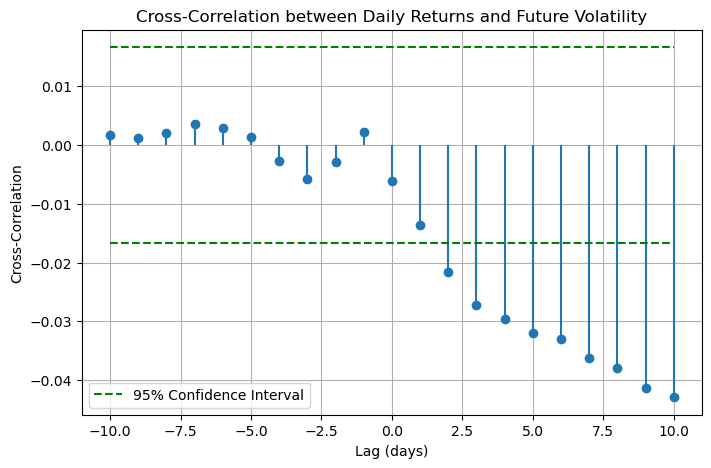

Evidence of leverage effect: Negative returns tend to precede increased volatility.


In [162]:
from scipy import signal as ss

# Rolling window to calculate volatility
window_size = 20 # 20-day rolling window
rolling_volatility = rt_d.rolling(window=window_size).std().dropna()

rt_d = rt_d[-len(rolling_volatility):]

# Debugging checks
print("rt_d (Daily Returns):\n", rt_d.head())
print("rolling_volatility (Future Volatility):\n"
,
rolling_volatility.head())

# Define the cross-correlation function
def ccf(x, y, lag_max=10):
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)
    return result[lo:hi]

# Execute cross-correlation between returns and future volatility
lag_max = 10
cross_corr = ccf(rt_d, rolling_volatility, lag_max=lag_max)

# Debugging check for cross_corr values
print("Cross-Correlation Values:", cross_corr)

lags = np.arange(-lag_max, lag_max + 1)
confint_daily = 1.96 / np.sqrt(len(rt_d))
confint_daily_upper = np.full(len(lags), confint_daily)
confint_daily_lower = -np.full(len(lags), confint_daily)

plt.figure(figsize=(8, 5))
plt.stem(lags, cross_corr, basefmt=" ")
plt.plot(lags, confint_daily_upper, color='green', linestyle='dashed', label="95% Confidence Interval")
plt.plot(lags, confint_daily_lower, color='green', linestyle='dashed')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Daily Returns and Future Volatility')
plt.legend()
plt.grid(True)
plt.show()

if np.any(cross_corr < -confint_daily):
    print("Evidence of leverage effect: Negative returns tend to precede increased volatility.")
else:
    print("No significant leverage effect detected: Negative returns do not significantly precede increased volatility.")



             Open   High    Low  Adj Close
DATE                                      
1990-01-02  17.24  17.24  17.24      17.24
1990-01-03  18.19  18.19  18.19      18.19
1990-01-04  19.22  19.22  19.22      19.22
1990-01-05  20.11  20.11  20.11      20.11
1990-01-08  20.26  20.26  20.26      20.26
             Open   High    Low  Adj Close
DATE                                      
2025-05-19  19.84  19.92  17.92      18.14
2025-05-20  18.46  18.68  17.70      18.09
2025-05-21  18.77  21.05  17.77      20.87
2025-05-22  20.62  22.07  19.64      20.28
2025-05-23  20.14  25.53  19.83      22.29
               KO.d   Open   High    Low  Adj Close
1990-01-02  3.36448  17.24  17.24  17.24      17.24
1990-01-03  3.31613  18.19  18.19  18.19      18.19
1990-01-04  3.29890  19.22  19.22  19.22      19.22
1990-01-05  3.27130  20.11  20.11  20.11      20.11
1990-01-08  3.34363  20.26  20.26  20.26      20.26


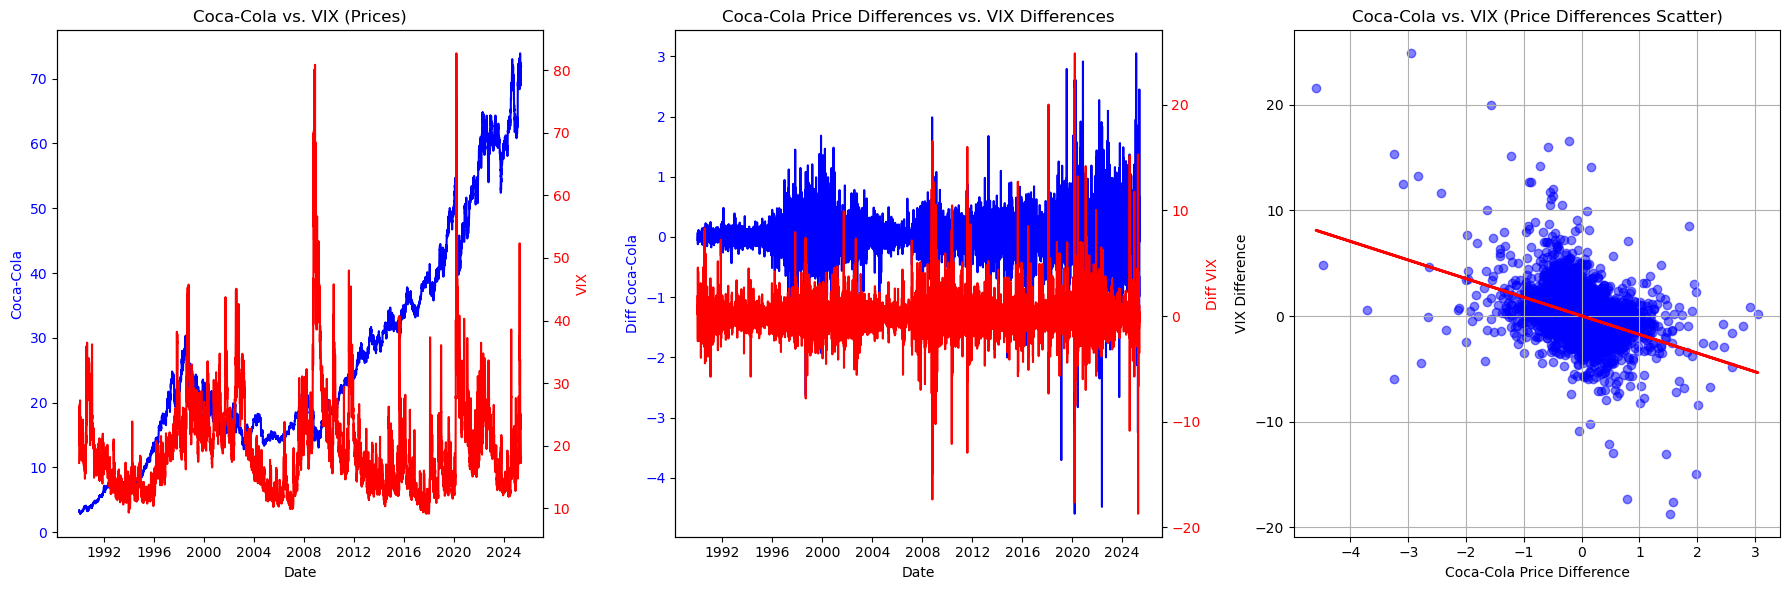

In [174]:
KO_d = KO["Adj Close"].copy().squeeze()
KO_d.name = 'KO.d'
KO_d.index = pd.to_datetime(KO_d.index)

# Load the CSV into a DataFrame
VIX = pd.read_csv("VIX_History.csv")

# Convert date to datetime format and sort
VIX['DATE'] = pd.to_datetime(VIX['DATE'])
VIX = VIX.sort_values('DATE')
VIX = VIX.set_index('DATE')
VIX.rename(columns={"CLOSE": "Adj Close","OPEN":'Open',"HIGH":'High', 'LOW':'Low', 'DATE':'Date'}, inplace=True)
print(VIX.head())
print (VIX.tail())

merged_df = pd.merge(KO_d, VIX, left_index=True, right_index=True,how='outer').dropna()
print (merged_df.head())
diff_df = merged_df.diff().dropna()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax1 = axes[0]
ax1.plot(merged_df.index, merged_df['KO.d'], label='Coca-Cola Prices',color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Coca-Cola', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['Adj Close'], label='VIX',color='red')
ax2.set_ylabel('VIX', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax1.set_title('Coca-Cola vs. VIX (Prices)')

ax3 = axes[1]
ax3.plot(diff_df.index, diff_df['KO.d'], label='Coca-Cola Price Differences', color='blue')
ax3.set_xlabel('Date')
ax3.set_ylabel('Diff Coca-Cola', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

ax4 = ax3.twinx()
ax4.plot(diff_df.index, diff_df['Adj Close'], label='VIX Differences', color='red')
ax4.set_ylabel('Diff VIX', color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax3.set_title('Coca-Cola Price Differences vs. VIX Differences')

ax5 = axes[2]
ax5.scatter(diff_df['KO.d'], diff_df['Adj Close'], color='blue', marker='o', alpha=0.5)
ax5.set_xlabel('Coca-Cola Price Difference')
ax5.set_ylabel('VIX Difference')
ax5.set_title('Coca-Cola vs. VIX (Price Differences Scatter)')
ax5.grid(True)

coefficients = np.polyfit(diff_df['KO.d'], diff_df['Adj Close'], 1)
regression_line = np.polyval(coefficients, diff_df['KO.d'])
ax5.plot(diff_df['KO.d'], regression_line, color='red', linewidth=2)

plt.tight_layout()
plt.show()